In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
inline_rc = dict(mpl.rcParams)
import re
from datetime import timedelta

In [2]:
hitches = [line.rstrip('\r\n') for line in open(r'C:\Users\syber\Desktop\THESIS\Hitches\THESIS-sandbox.csv')]
regex = re.compile(r'((?P<days>\d+?)d)?((?P<hours>\d+?)h)?((?P<minutes>\d+?)m)?((?P<seconds>\d+?)s) (?P<date>\d+?)?$')

def parse_time(time_str):
    parts = regex.match(time_str)
    if not parts:
        return
    parts = parts.groupdict()
    
    time_params = {}
    interval_params = ['days', 'hours', 'minutes', 'seconds']
    for (name) in (interval_params):
        time_params[name] = int(parts[name])
           
    return int(timedelta(**time_params).seconds), int(parts['date']) 

matrix = np.asmatrix(map(parse_time, hitches))
print matrix[3:7]

[[ 405 1806]
 [ 857 1806]
 [ 568 1806]
 [ 329 1806]]


In [3]:
months = np.unique(np.array(matrix[:,1]))
print type(months), type(months[0])
print months

<type 'numpy.ndarray'> <type 'numpy.int32'>
[1612 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1801 1802
 1803 1804 1805 1806]


In [85]:
arr = []
for date in months:
    hitches_for_month = np.squeeze(np.asarray(matrix[(matrix[:,1] == date) & (matrix[:,0]/3600.0 < 24)]))
    mean = np.mean(np.array(hitches_for_month).astype(np.int))
    std = np.std(np.array(hitches_for_month).astype(np.int))
    arr.append([date, mean, std])
arr = np.asarray(arr)
print arr

[[  1612.          10525.90537634  21035.59460543]
 [  1701.          13141.04709141  23920.4951169 ]
 [  1702.          13297.0819209   24562.93757038]
 [  1703.          11080.77393075  21427.85034632]
 [  1704.          18445.36518047  29597.63570811]
 [  1705.          19117.68502582  29110.42144806]
 [  1706.          11118.12106538  22457.67780422]
 [  1707.          10292.38632479  21152.34017728]
 [  1708.           9569.40127389  21044.54824401]
 [  1709.          11938.6880597   22686.92169129]
 [  1710.           7060.9845679   17012.0956498 ]
 [  1711.           4819.5399361   12714.45353872]
 [  1712.           6421.59710495  16822.17726548]
 [  1801.           2612.64821429  10588.11193506]
 [  1802.           1780.90322581   8433.00185047]
 [  1803.           4225.70588235  13301.87375039]
 [  1804.           3431.44481054  11490.65294476]
 [  1805.           3077.3776      11267.36505537]
 [  1806.           3453.17        12048.2257466 ]]


In [ ]:
for style in plt.style.available:
    print style
    plt.style.use(style)
    plt.bar(range(len(arr)), arr[:,1], align='center')  # python 2.x
    plt.xticks(range(len(arr)), arr[:,0])
    plt.show()
    mpl.rcParams.update(inline_rc)

In [71]:
regex_int = re.compile(r'^(?P<year>\d{2}?)?(?P<month>\d+?)$')

def parse_int(time_int):
    parts = regex.match(str(int(time_int)))
    if not parts:
        return
    parts = parts.groupdict()
          
    return parts['month'] + '.' + parts['year']

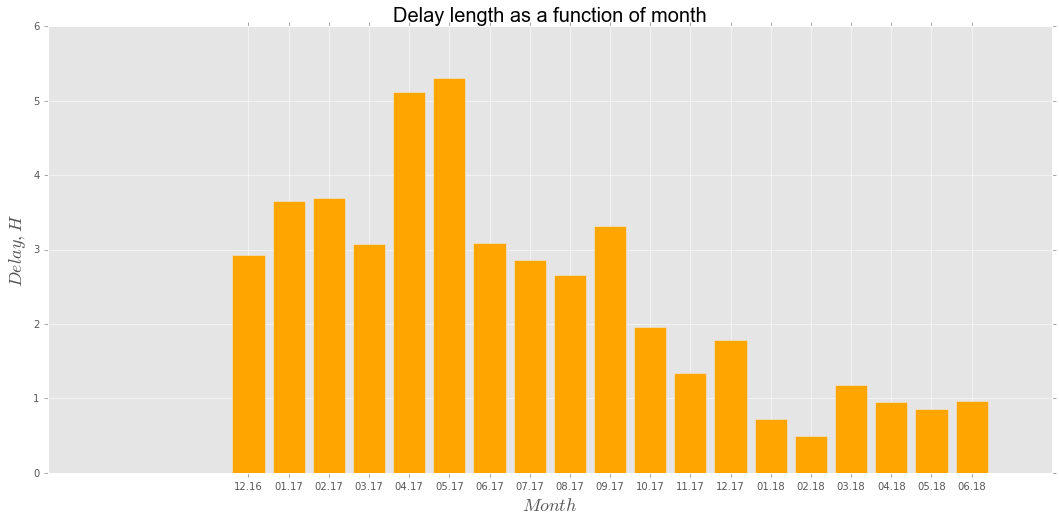

In [87]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.bar(range(len(arr)), arr[:,1]/3600.0, align='center', color='orange') #, yerr=arr[:,2]/3600.0 
plt.xticks(range(len(arr)), map(parse_int, arr[:,0]))
plt.title(r'Delay length as a function of month', fontsize=20)  
plt.ylabel(r'$Delay, H$', fontsize=18)
plt.xlabel(r'$Month$', fontsize=18)
plt.savefig(r'C:\Users\syber\Desktop\THESIS\Hitches\Hitches.png', bbox_inches='tight', dpi=200) #, pad_inches=0.05)  